<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw3_bsm_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider an European option with

- call type
- strike = 110
- maturity = T underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.
- Let $\sigma = 20\%$ fixed. plot $T\mapsto f(0.2,T)$ when $T$ is ranging over $(0.5, 2)$
- Let $T=1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$
- Describe your observations. Do you think the same behavior is also true for put?
- Could you prove your observations?

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return np.max([0, (s - k)*otype])

In [0]:
'''============
Gbm class inherited from sde_1d
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [0]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [0]:
'''========
Set up gbm and call option for the first situation
=========='''

gbm1 = Gbm(init_state = 100,#initial:100
           drift_ratio = .0475,#interest rate: 4.75%
           vol_ratio = 0.2#volatility fixed at 20%
              )
option1 = VanillaOption(
    otype = 1,#call option
    strike = 110.,#strike: 110
)

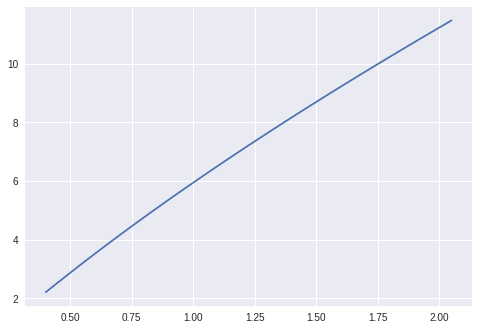

In [71]:
'''========
Plot call price as a function of option maturity
=========='''

option1.maturity = np.arange(0.4, 2.1, 0.05)
plt.plot(option1.maturity, gbm1.bsm_price(option1))
plt.show()

In [0]:
'''========
Set up gbm and call option for the second situation
=========='''

gbm2 = Gbm(init_state = 100,#initial:100
           drift_ratio = .0475,#interest rate: 4.75%
              )
option2 = VanillaOption(
    otype = 1,#call option
    strike = 110.,#strike: 110
    maturity = 1#maturity fixed at 1
)

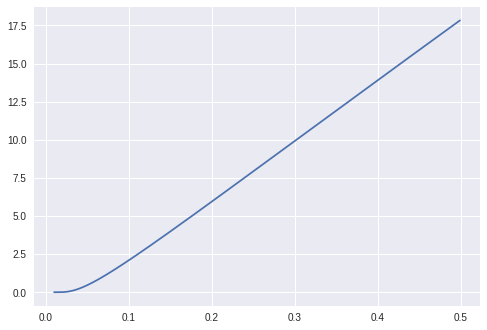

In [73]:
'''========
Plot call price as a function of volatility
=========='''

gbm2.vol_ratio = np.arange(0.01, 0.5, 0.001)
plt.plot(gbm2.vol_ratio, gbm2.bsm_price(option2))
plt.show()

#Observation

We observe that for fixed market volatility, under the Black Scholes model, the price for a call option increases as the maturity for the call option increases for $T\in(0.5, 2)$;

for fixed option maturity, the price for the call option also increases when the market volatility increases for $\sigma\in (0.05, 0.5)$.


In [0]:
'''========
Set up the put option for the first situation, use same bgm1
=========='''

option3 = VanillaOption(
    otype = -1,#put option
    strike = 110.,#strike: 110
)

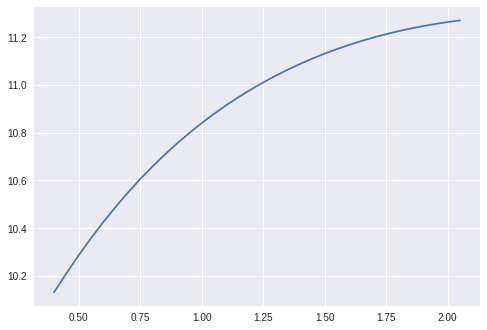

In [75]:
'''========
Plot put price as a function of option maturity
=========='''

option3.maturity = np.arange(0.4, 2.1, 0.05)
plt.plot(option3.maturity, gbm1.bsm_price(option3))
plt.show()

In [0]:
'''========
Set up the put option for the second situation, use same gbm2
=========='''

option4 = VanillaOption(
    otype = -1,#put option
    strike = 110.,#strike: 110
    maturity = 1#maturity fixed at 1
)

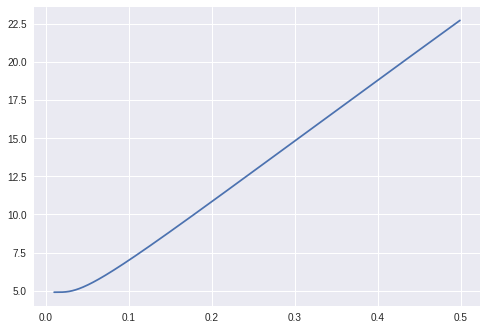

In [77]:
'''========
Plot put price as a function of volatility
=========='''

gbm2.vol_ratio = np.arange(0.01, 0.5, 0.001)
plt.plot(gbm2.vol_ratio, gbm2.bsm_price(option4))
plt.show()


#Conclusion and additional observation

Under the same ranges of $T$ and $\sigma$, the same observation holds for a put option of the same strike under the same initial stock price.

In fact, we can actually prove that in general, as volatility increases, the option prices increase for both call and put. However, we cannot say the same for maturity of both call and put options. In fact, for a different range of maturity, we actually observe a decrease in put option price as maturity increases.

Below we have the counter example for the second claim, and proof for the first claim.

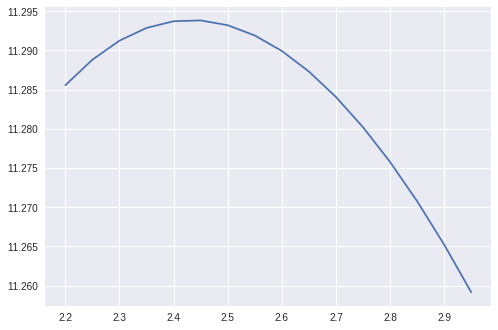

In [78]:
'''========
Counter example:
Using gbm1 and put option for the first situation (option3),
Plot the put option price as a function of maturity with a different range
=========='''

option3.maturity = np.arange(2.2,3, 0.05)#using a different range of maturity T
plt.plot(option3.maturity, gbm1.bsm_price(option3))
plt.show()



#Proof

First, we have the following formulas for the bsm option prices, $C_0, K_0$ that has maturity $T$ and strike $K$, under gbm with initial stock price $S_0$, risk-free rate $r$:

(1) $$C_0=S_0\phi(d_1)-Ke^{-rT}\phi(d_2)$$

(2)$$P_0=Ke^{-rT}\phi(-d_2)-S_0\phi(-d_1)$$

(3)$$d_1=\frac{(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}$$

(4)$$d_2=\frac{(r-\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}=d_1-\sigma\sqrt{T}$$

(5)$$C_0-P_0=S_0-e^{-rT}K$$


##Volatility: as volatility increases, call and put option prices incrases ($Vega>0$)

We need to show
$$\frac{\delta V}{\delta\sigma}>0$$
where $V$ is the option price (either call or put)

First, for call options,

$$\frac{\delta C_0}{\delta\sigma}=S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)\frac{\delta d_2}{\delta\sigma}$$

from equation (4) we can obtain that

$$\frac{\delta d_2}{\delta\sigma}=\frac{\delta d_1}{\delta\sigma}-\sqrt{T}$$

Thus the partial derivative of $C$ with respect to $\sigma$ becomes

$$\frac{\delta C_0}{\delta\sigma}=S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)(\frac{\delta d_1}{\delta\sigma}-\sqrt{T})$$

$$=(S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)\frac{\delta d_1}{\delta\sigma})+Ke^{-rT}\phi'(d_2)\sqrt{T}$$

for $\phi'(d_1)$ and $\phi'(d_2)$,

$$\phi'(d_1)=\frac{\delta}{\delta d_1}\int_{-\infty}^{d_1}{\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}dx=\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}$$

$$\phi'(d_2)=\frac{\delta}{\delta d_2}\int_{-\infty}^{d_2}{\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}dx=\frac{1}{\sqrt{2\pi}}e^{-\frac{d_2^2}{2}}$$

Using these, and the relation in equation (4) between $d_1$ and $d_2$, we have

$$S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)\frac{\delta d_1}{\delta\sigma}=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT}\frac{1}{\sqrt{2\pi}}e^{-\frac{(d_1-\sigma\sqrt{T})^2}{2}})$$

$$=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT}\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}})$$

$$=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}})$$

In the exponent of $Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}}$, using equation (3) for $d_1$ we can get:

$$-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}=-rT-\frac{d_1^2}{2}+\frac{(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}\sigma\sqrt{T}-\frac{\sigma^2T}{2}$$

$$=-rT-\frac{d_1^2}{2}+(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})-\frac{\sigma^2T}{2}$$

$$=-\frac{d_1^2}{2}-ln(\frac{K}{S_0})$$

Thus the term simplifies to 

$$Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}}=Ke^{-\frac{d_1^2}{2}-ln(\frac{K}{S_0})}\frac{1}{\sqrt{2\pi}}=S_0e^{-\frac{d_1^2}{2}}\frac{1}{\sqrt{2\pi}}$$

Since we now have

$$S_0\phi'(d_1)=Ke^{-rT}\phi'(d_2)$$

For the original partial derivative we obtain

$$\frac{\delta C_0}{\delta\sigma}=Ke^{-rT}\phi'(d_2)\sqrt{T}=S_0\phi'(d_1)\sqrt{T}$$

which is always positive for $T>0$

to find $\frac{\delta P_0}{\delta\sigma}$, we can use the put-call parity, equation (5), and find

$$\frac{\delta C_0}{\delta\sigma}-\frac{\delta P_0}{\delta\sigma}=0$$

Thus put options have the same positive partial derivatives with respect to $\sigma$.

Therefore as volatility increases, the prices for both call and put options increase

end